# 拡張カルマンフィルタ

ベイズベースの自己位置推定アルゴリズムのおさらい

パーティクルフィルタも同様

## 状態遷移について

$$
\hat{b}_{t}({\bf x}) = \int_{{\bf x}^{\prime} \in \mathit X} p({\bf x} \mid {\bf x}^{\prime}, {\bf \nu}_{t}) b_{t-1}({\bf x}^{\prime}) d{\bf x}^{\prime}
$$

$p({\bf x} \mid {\bf x}^{\prime}, {\bf \nu}_{t})$は状態遷移モデル

$b_{t-1}({\bf x}^{\prime})$はある姿勢${\bf x}^{\prime}$での遷移前の信念密度

これを全姿勢について足し合わせるという意味

これにより遷移後の信念密度が求まる

## 観測の反映について

ベイズがつかえる

$$
b_{t}({\bf x}) = \hat{b}_{t}({\bf x} \mid {\bf z}_{t}) = \frac{p({\bf z}_{t} \mid {\bf x}) \hat{b}_{t}({\bf x})}{p({\bf z}_{t})} = \eta p({\bf z}_{t} \mid {\bf x}) \hat{b}_{t}({\bf x})
$$

$p({\bf z}_{t} \mid {\bf x})$は観測モデル

センサ値が観測毎に独立なら

$$
b_{t}({\bf x}) = \eta \hat{b}_{t}({\bf x}) \prod_{j=0}^{N_{m}-1}p_{j}({\bf z}_{j,t} \mid {\bf x})
$$

となる

In [1]:
import sys
sys.path.append('../src')
import importlib

import numpy as np

import drawables

def reload():
    importlib.reload(drawables)

reload()

In [6]:
# 検証用の関数
reload()
def trial(debuggable=False):
    time_interval = 0.1
    sim = drawables.Simulator(30., time_interval, debuggable=debuggable)
    
    m = drawables.DrawableMap()
    for ln in [(-4., 2.), (2., -3.), (3., 3.)]:
        m.append_landmark(drawables.DrawablePoint2DLandmark(*ln))
    sim.append(m)
    
    initial_poses = [
        np.array([0., 0., 0.]).T,
        np.array([-1., 0., 0.]).T,
        np.array([0., 1., 0.]).T]
    for ip in initial_poses:
        e = drawables.DrawableExtendedKalmanFilter(
            m, ip, distance_dev_rate=0.14, direction_dev=0.05)
        a = drawables.DrawableEstimationAgent(
            time_interval, 0.2, 10./180.*np.pi, estimator=e)
        r = drawables.DrawableRealRobot(ip, sensor=drawables.DrawableCamera(m), agent=a, color='red')
        sim.append(r)
    
    sim.draw()

<IPython.core.display.Javascript object>


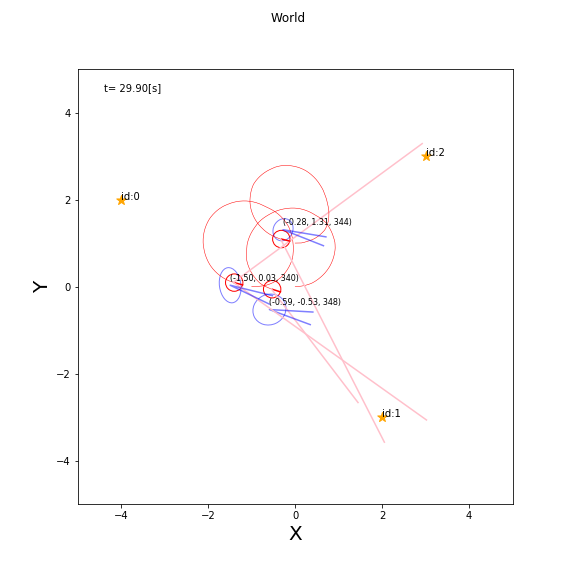

In [7]:
trial(debuggable=False)